# Facebook post analysis

The goal is to analyze how the post type changed through time.

### Step 0: Using Facebook Graph API 
Use the Facebook API to get information about my posts. In this case, I use a file already downloaded through cURL from the Graph API explorer.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import json
import urllib.request

In [3]:
# token = "965088163650427|38fx8GsBIwRCc72rryz704-UiS0"
token = "EAACEdEose0cBAMYe6vBcgbtE1T7F5S8bI0fm5cws5je48fERrlIyWRR0TCKsQQBCRnOupWO9HDIevbeiG57HbuQkVU3ZBxU5xTBrmZBWILo4iWHaXoTwPChPxqrJw2bIbmzzwzOljbMzv0ZAJFeoyjRxmUAgwK2HvAFM0Hf7dE4qUbbyXhD5dvSErOV8NFai6IObW9vRoY15eiYWDGu"
req = "https://graph.facebook.com/v3.0/me?fields=feed.limit(500)%7Bmessage%2Cfrom%2Creactions%2Cstatus_type%2Ctype%2Clink%2Cstory%2Ccreated_time%7D&access_token="+token
contents = urllib.request.urlopen(req)
data = json.load(contents)

nextpage = data['feed']['paging']['next']
contents2 = urllib.request.urlopen(nextpage)
data2 = json.load(contents2)

data['feed']['data'].extend(data2['data'])

In [4]:
posts_array = [x for x in data['feed']['data']]
updates_array = [feed['message'] for feed in data['feed']['data'] if 'message' in feed]

print("Number of status update: "+str(len(updates_array)))
print("Number of total posts: "+str(len(posts_array)))

Number of status update: 373
Number of total posts: 548


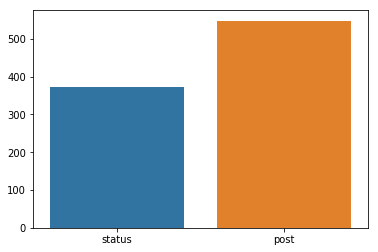

In [5]:
x = ['status', 'post']
y = [len(updates_array), len(posts_array)]
sns.barplot(x=x, y=y)

### How things changed from 2014?

Let's plot the difference in post *type* and *status_type* for year 2014 and 2018. What we're interested in is to look, among the 500 posts loaded, how the distribution of *type* and *status_type* has changed:

- did I post more images or status updates in 2014? What about now?
- did I do as many updates from mobile in 2014 as I do now?

For this analysis, I'll use all posts published during year 2014 and all those posted in 2018.

In [15]:
# Request posts from 2014-01-01 to 2014-12-31
req_2014 = "https://graph.facebook.com/v3.0/me/feed?fields=type%2Cstatus_type%2Ccreated_time%2Creactions%2Ccoordinates%2Cplace&limit=500&since=2014-01-01&until=2014-12-31&access_token="+token
contents_2014 = urllib.request.urlopen(req_2014)
data_2014 = json.load(contents_2014)

nextpage_2014 = data_2014['paging']['next']
contents2_2014 = urllib.request.urlopen(nextpage_2014)
data2_2014 = json.load(contents2_2014)

data_2014['data'].extend(data2_2014['data'])

In [22]:
# Request posts from 2018-01-01 to 2018-12-31
req_2018 = "https://graph.facebook.com/v3.0/me/feed?fields=type%2Cstatus_type%2Ccreated_time%2Creactions%2Ccoordinates%2Cplace&limit=500&since=2018-01-01&until=2018-12-31&access_token="+token
contents_2018 = urllib.request.urlopen(req_2018)
data_2018 = json.load(contents_2018)

nextpage_2018 = data_2018['paging']['next']
contents2_2018 = urllib.request.urlopen(nextpage_2018)
data2_2018 = json.load(contents2_2018)

data_2018['data'].extend(data2_2018['data'])

In [24]:
df_2014 = pd.DataFrame(data = data_2014['data'])
df_2018 = pd.DataFrame(data = data_2018['data'])

In [56]:
df_2014_bytype = df_2014.groupby(by = df_2014.type, axis = 0).count().reset_index()
df_2018_bytype = df_2018.groupby(by = df_2018.type, axis = 0).count().reset_index()
print("### DATA FROM 2014 ###")
print(df_2014_bytype[['type','id']])
print("######################")
print("### DATA FROM 2018 ###")
print(df_2018_bytype[['type','id']])
print("######################")

### DATA FROM 2014 ###
     type  id
0    link  35
1    note   1
2   photo  70
3  status  28
4   video   9
######################
### DATA FROM 2018 ###
     type  id
0    link   3
1   photo  31
2  status   5
3   video   7
######################


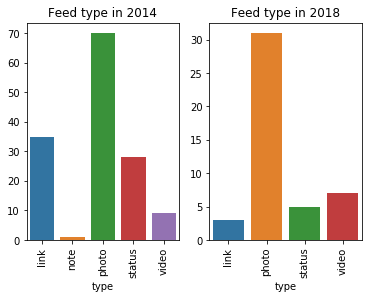

In [50]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Àdd the subplots
b1 = sns.barplot(x=df_2014_bytype.type, y=df_2014_bytype.id.values, ax=ax1)
b2 = sns.barplot(x=df_2018_bytype.type, y=df_2018_bytype.id.values, ax=ax2)

# Rotate the x labels
b1.set_xticklabels(b1.get_xticklabels(), rotation=90)
b2.set_xticklabels(b2.get_xticklabels(), rotation=90)

# Insert title of plot
b1.set_title("Feed type in 2014")
b2.set_title("Feed type in 2018")

plt.show()

In [57]:
df_2014_bystatustype = df_2014.groupby(by = df_2014.status_type, axis = 0).count().reset_index()
df_2018_bystatustype = df_2018.groupby(by = df_2018.status_type, axis = 0).count().reset_index()
print("### DATA FROM 2014 ###")
print(df_2014_bystatustype[['status_type','id']])
print("######################")
print("### DATA FROM 2018 ###")
print(df_2018_bystatustype[['status_type','id']])
print("######################")

### DATA FROM 2014 ###
            status_type  id
0          added_photos  37
1           added_video   6
2  mobile_status_update  27
3       published_story   4
4          shared_story  68
######################
### DATA FROM 2018 ###
            status_type  id
0          added_photos  21
1           added_video   1
2  mobile_status_update  23
######################


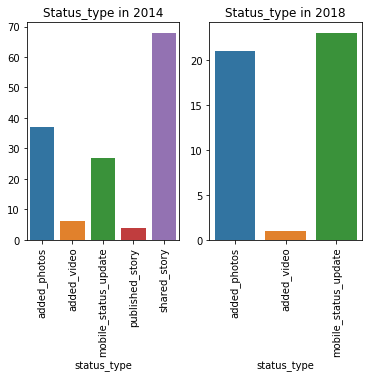

In [55]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

b1 = sns.barplot(x=df_2014_bystatustype.status_type, y=df_2014_bystatustype.id.values, ax=ax1)
b2 = sns.barplot(x=df_2018_bystatustype.status_type, y=df_2018_bystatustype.id.values, ax=ax2)

b1.set_xticklabels(b1.get_xticklabels(), rotation=90)
b2.set_xticklabels(b2.get_xticklabels(), rotation=90)

# Insert title of plot
b1.set_title("Status_type in 2014")
b2.set_title("Status_type in 2018")

plt.show()

_________________________________________

### Metadata Analysis

Not all information contained in Facebook feed data is actually shown on the platform itself.

**Goal**: show the metadata associated with the different posts in 2014 and 2018.

In [69]:
types_2014 = df_2018.type.unique()
status_types_2014 = df_2014.status_type.unique()
types_2018 = df_2018.type.unique()
status_types_2018 = df_2018.status_type.unique()

print("Types_2014: "+str(types_2014))
print("Types_2018: "+str(types_2018))
print("Status_types_2014: "+str(status_types_2014))
print("Status_types_2018: "+str(status_types_2018))

Types_2014: ['photo' 'link' 'video' 'status']
Types_2018: ['photo' 'link' 'video' 'status']
Status_types_2014: ['shared_story' 'published_story' nan 'added_photos'
 'mobile_status_update' 'added_video']
Status_types_2018: ['added_photos' 'mobile_status_update' 'added_video' nan]


In [95]:
metadata_2014 = set()
metadata_2018 = set()

# Obtain metadata name for one post of every type
for typ in types_2014:
    # Get the post ID
    post_id = df_2014[df_2014['type']==typ].head(1).id.values[0]
    # Do a new request asking the metadata
    req = "https://graph.facebook.com/v3.0/"+str(post_id)+"?metadata=1&access_token="+token
    contents = urllib.request.urlopen(req)
    metadata = json.load(contents)
    # Extract the metadata field name
    md_names = [field['name'] for field in metadata['metadata']['fields']]
    # Insert into metadata set
    metadata_2014.update(md_names)
    
# do the same for 2018
for typ in types_2018:
    # Get the post ID
    post_id = df_2018[df_2018['type']==typ].head(1).id.values[0]
    # Do a new request asking the metadata
    req = "https://graph.facebook.com/v3.0/"+str(post_id)+"?metadata=1&access_token="+token
    contents = urllib.request.urlopen(req)
    metadata = json.load(contents)
    # Extract the metadata field name
    md_names = [field['name'] for field in metadata['metadata']['fields']]
    # Insert into metadata set
    metadata_2018.update(md_names)
    
# Extract the different fields from the two metadata sets
different_metadata = metadata_2014.symmetric_difference_update(metadata_2018)
print(different_metadata)

None
